# Project Title
*all language subject to change*

**Author:** Axel Christian Cabato

**Date:** [Date]

# 1. Introduction
The goal of this project is to utilize a [Kaggle](https://www.kaggle.com) dataset to perform data analysis and generate a report. Documenting my processes, insights, and conclusions within this Jupyter Notebook.

This analysis...

## 2. Dataset Loading & Exploratory Data Analysis

- Data Source: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv
- Data Format: Comma-separated values (CSV)
- [Kaggle](https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset?select=gym_members_exercise_tracking.csv) Description: This dataset provides a detailed overview of gym members' exercise routines, physical attributes, and fitness metrics, including key performance indicators such as heart rate, calories burned, and workout duration.

In [3]:
# Import pathlib and pandas libraries
from pathlib import Path
import pandas as pd

# Define the base directory
BASE_DIR = Path.cwd()

# Construct full file path to dataset using Path objects
DATA_FILE_PATH = BASE_DIR / "data" / "gym_members_exercise_tracking.csv"

# Use the path object in the read_csv function
df = pd.read_csv(DATA_FILE_PATH)


# Confirm successful load of the dataset by previewing the last 5 observations
df.tail()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74
972,46,Male,88.7,1.63,166,146,66,0.75,542.0,Strength,28.8,3.5,2,1,33.38


### Exploratory Data Analysis

#### Data Profiling

In [4]:
# Output a concicise summary of the DataFrame
print("DATAFRAME SUMMARY")
df.info()

print("\n")

# Check for any missing values
print("MISSING VALUES CHECK")
print(df.isnull().sum())

DATAFRAME SUMMARY
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  9

Through our profiling of the dataset, we can confirm its structural integrity. It consists of 973 observations and 15 columns, with each column appropriately named and typed according to its quantitative or qualitative nature. A complete check for missing values across all fields revealed none.

In [5]:
# Generate descriptive statistics for numerical columns
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


This initial inspection of the data showed no signs of extreme outliers or data entry errors and all numerical features appear to have a reasonable range of values.

For **BMI** and **Fat_Percentage**: 
- The minimum and maximum values for both are physiologically plausible, confirming the data is within a realistic human-centric scale.
- They also exhibit a symmetrical distribution, as evidenced by their mean and median values being in close proximity. 
    - This central tendency, combined with a reasonable standard deviation for each, suggests the absence of significant outliers, indicating a consistent and predictable spread of values for both metrics within the dataset.

In [6]:
# Display the total count of each distinct row under "Gender" and "Workout_Type"
df[["Gender", "Workout_Type"]].value_counts()

Gender  Workout_Type
Male    Strength        135
        Yoga            133
        Cardio          129
Female  Cardio          126
        Strength        123
Male    HIIT            114
Female  HIIT            107
        Yoga            106
Name: count, dtype: int64

All categorical features contain a small and consistent set of unique values. Particularly for **Gender** and **Workout_Type**:
- For **Gender**, it is a binary categorical value with only two disctinct classes ("Male" and "Female"). The absence of additional unique values, such as inconsistent spellings, abbreviations, or missing value placeholders, confirms the high degree of data consistency for this feature.
- Similarly, **Workout_Type** also has a small amount of disctinct and consistently labeled classes: "Cardio", "Strength", "HIIT" and "Yoga". This categorical integrity ensures that the variable is ready for direct use in analysis or for a simple transformation into a quantitative format, such as one-hot encoding, without requiring a separate data cleaning stage.

---

#### Recognizing the Data Source & Context

While clean in structure, the dataset contains several potential biases, limitations, and quirks that a data analyst must consider. The primary bias is that the dataset is simulated and was generated using averages from publicly available studies and industry reports. This means the data may under- or over-represent certain behaviors or characteristics.
- For instance, the randomization of **Experience_Level** and **Workout_Frequency** might not perfectly reflect the actual distribution of gym members, where, for example, a large number might be beginners who work out less frequently. This synthetic nature is *the most significant limitation*, as it lacks the unpredictable and messy nuances of real human behavior.
- Any insights or models derived from this dataset would need to be validated with actual, real-world data before being applied to a genuine scenario.

The dataset also has a few quirks that are uncommon in real-world data. It has **no missing values** and all categorical values are perfectly consistent, *which is highly unusual*. 

Furthermore, the data is simplified and contains only the variables that were explicitly defined in the generation process. 
- For example, the **Workout_Type** column is limited to a small, consistent set of categories (*Cardio*, *Strength*, *Yoga*, *HIIT*), and does not reflect the full range of possible exercises performed by gym members.

> This foundational understanding will serve as a solid basis for our deeper exploratory data analysis.

---

To prepare the data for any audience who might be more familiar with imperial units, I will perform some feature engineering by constructing new attributes from the existing dataset.
- Specifically, I will convert the **Weight (kg)** and **Height (m)** variables from their current metric system to their imperial counterparts. This will be done to ensure the data is standardized for any subsequent statistical analysis and for enhanced data visualization tailored to our target audience.

In [7]:
# Meter to Feet Conversion
df["Height (ft)"] = round(df["Height (m)"] * 3.28, 2)

# Kilogram to Pound Conversion
df["Weight (lb)"] = round(df["Weight (kg)"] * 2.2)

# Verify post-conversaion values are correct
df[["Height (m)", "Height (ft)", "Weight (kg)", "Weight (lb)"]]

,Height (m),Height (ft),Weight (kg),Weight (lb)
0,1.71,5.61,88.3,194.0
1,1.53,5.02,74.9,165.0
2,1.66,5.44,68.1,150.0
3,1.70,5.58,53.2,117.0
4,1.79,5.87,46.1,101.0
...,...,...,...,...
968,1.74,5.71,87.1,192.0
969,1.61,5.28,66.6,147.0
970,1.76,5.77,60.4,133.0
971,1.83,6.00,126.4,278.0


In [8]:
df[["Height (ft)", "Weight (lb)"]].describe()

,Height (ft),Weight (lb)
count,973.000000,973.000000
mean,5.650021,162.476876
std,0.418962,46.663302
min,4.920000,88.000000
25%,5.310000,128.000000
50%,5.610000,154.000000
75%,5.900000,189.000000
max,6.560000,286.000000


I use the `.describe()` method to validate the newly-engineered **Weight (lbs)** and **Height (ft)** features, confirming that the new columns have a reasonable range of values and are correctly populated. This ensures the integrity of our dataset for subsequent analysis.

> I will be using Imperial units in my analyses going foward.

---

#### Data Visualization

Having performed the necessary data profiling and cleaning, I can now move on to Data Visualization. By visually exploring the dataset, I'll gain a deeper understanding of the health metrics and workout habits of the simulated gym members.

Firstly, I have determined that the first step of my visual analysis should be to examine the distribution of our numerical features individually, using *Univariate Analysis*.

##### Univariate Analysis

This type of analysis will allow me to understand the central tendency and the spread of the data, and to easily spot any potential outliers. To accomplish this, I will generate histograms for each of the key numerical columns.

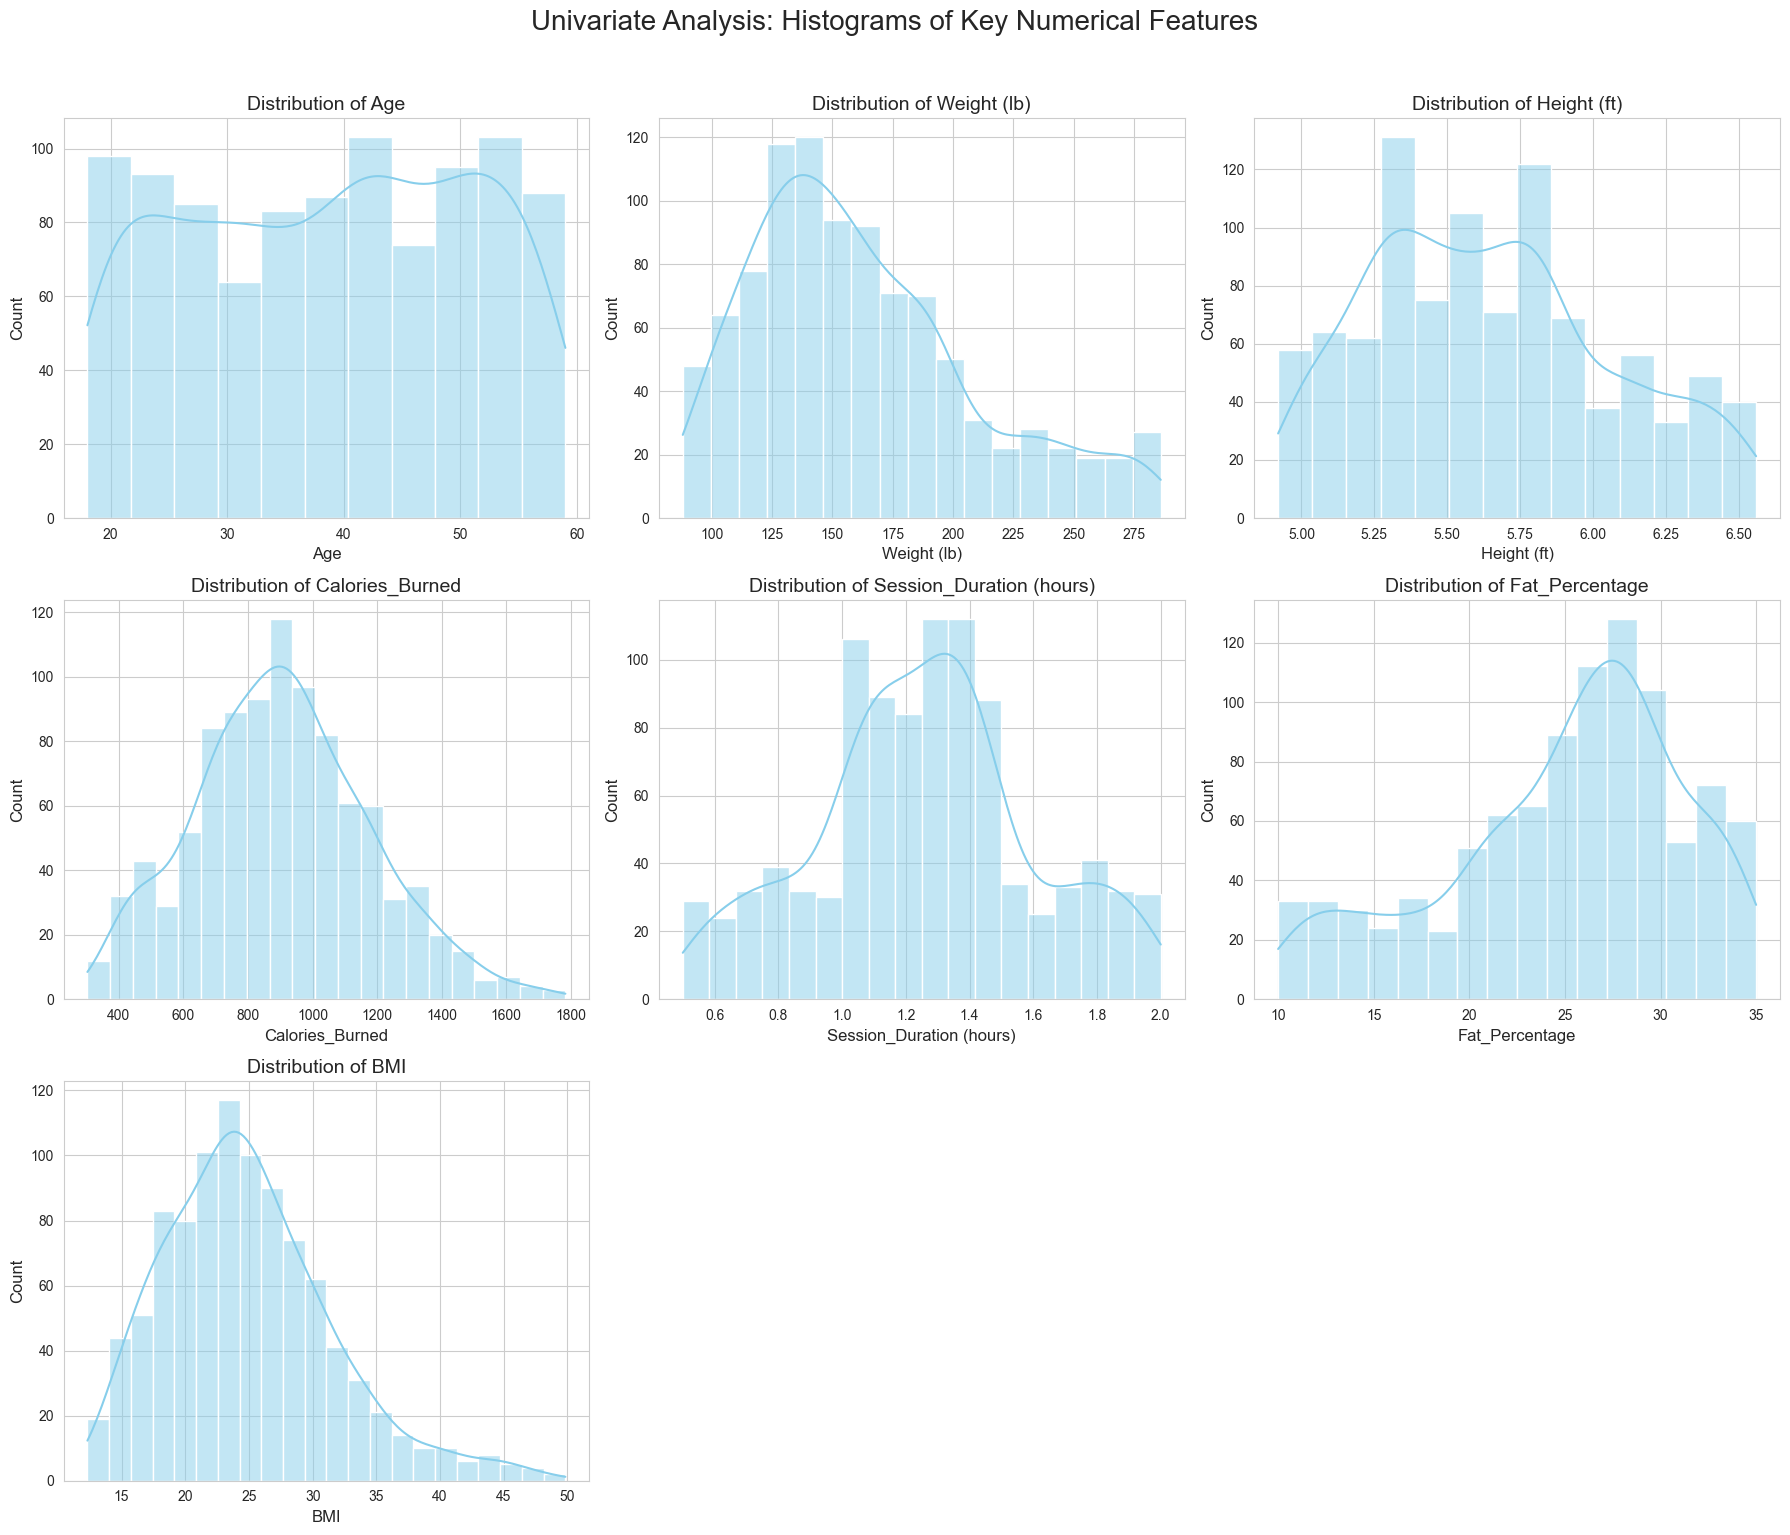

In [9]:
# Import the Matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Define the numerical features for univariate analysis
numerical_features = ["Age", "Weight (lb)", "Height (ft)", "Calories_Burned",
                      "Session_Duration (hours)", "Fat_Percentage", "BMI"]

# Set the style for the plots
sns.set_style("whitegrid")

# Create a figure and a set of subplots (3x3 grid for 7 plots)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# Iterate through the numerical features and create a histogram for each
for i, feature in enumerate(numerical_features):
    ax = axes[i]
    # Use seaborn's histplot to create a histogram with a KDE curve
    sns.histplot(data=df, x=feature, kde=True, ax=ax, color="skyblue")
    ax.set_title(f"Distribution of {feature}", fontsize=14)
    ax.set_xlabel(feature, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

# Hide any unused subplots
for j in range(len(numerical_features), len(axes)):
    axes[j].axis("off")

# Set a main title for the entire figure
fig.suptitle(
    "Univariate Analysis: Histograms of Key Numerical Features", fontsize=20, y=1.02)

# Adjust layout to prevent titles from overlapping
plt.tight_layout()

# Display the plots
plt.show()

###### Key Variable Insights

1. **Age**
    - Suggests the gym has a broad membership base, heavily concentrated in the 20 to 50 age range, with few very young or very old members.
2. **Calories_Burned**
    - The average calories burned is approximately 905 kcal. The majority of sessions fall within one standard deviation (±272.64) of this mean, indicating consistent performance for most members.
3. **Session_Duration (hours)**
    - Shows that the typical workout duration is slightly over an hour, with very few sessions extending past 1.5 hours (as the 75th percentile is 1.46 hours), and few very short sessions (minimum 0.5 hours).
4. **Body Mass Index  (BMI)**
    - The majority of members have a BMI near the average of 24.91, which is at the upper end of the 'Normal' weight category. The right skew and the large maximum value suggest a small number of members with significantly higher BMI values, which could be an important factor to analyze in relation to exercise performance or health outcomes.

The univariate analysis confirms that the gym's member base is middle-aged, with an average age of 38.68 years. Members demonstrate moderate commitment, with typical workout durations around 1.26 hours, burning an average of 905 calories per session. While most members fall within a healthy-to-average BMI range, the presence of a few high-BMI outliers suggests an interesting area for further investigation.

##### Categorical Analysis

Next, I move onto Categorical Analysis. I will utilize bar charts to analyze the counts and proportions of each categorical variable to help me understand the composition of the dataset and how different groups behave.

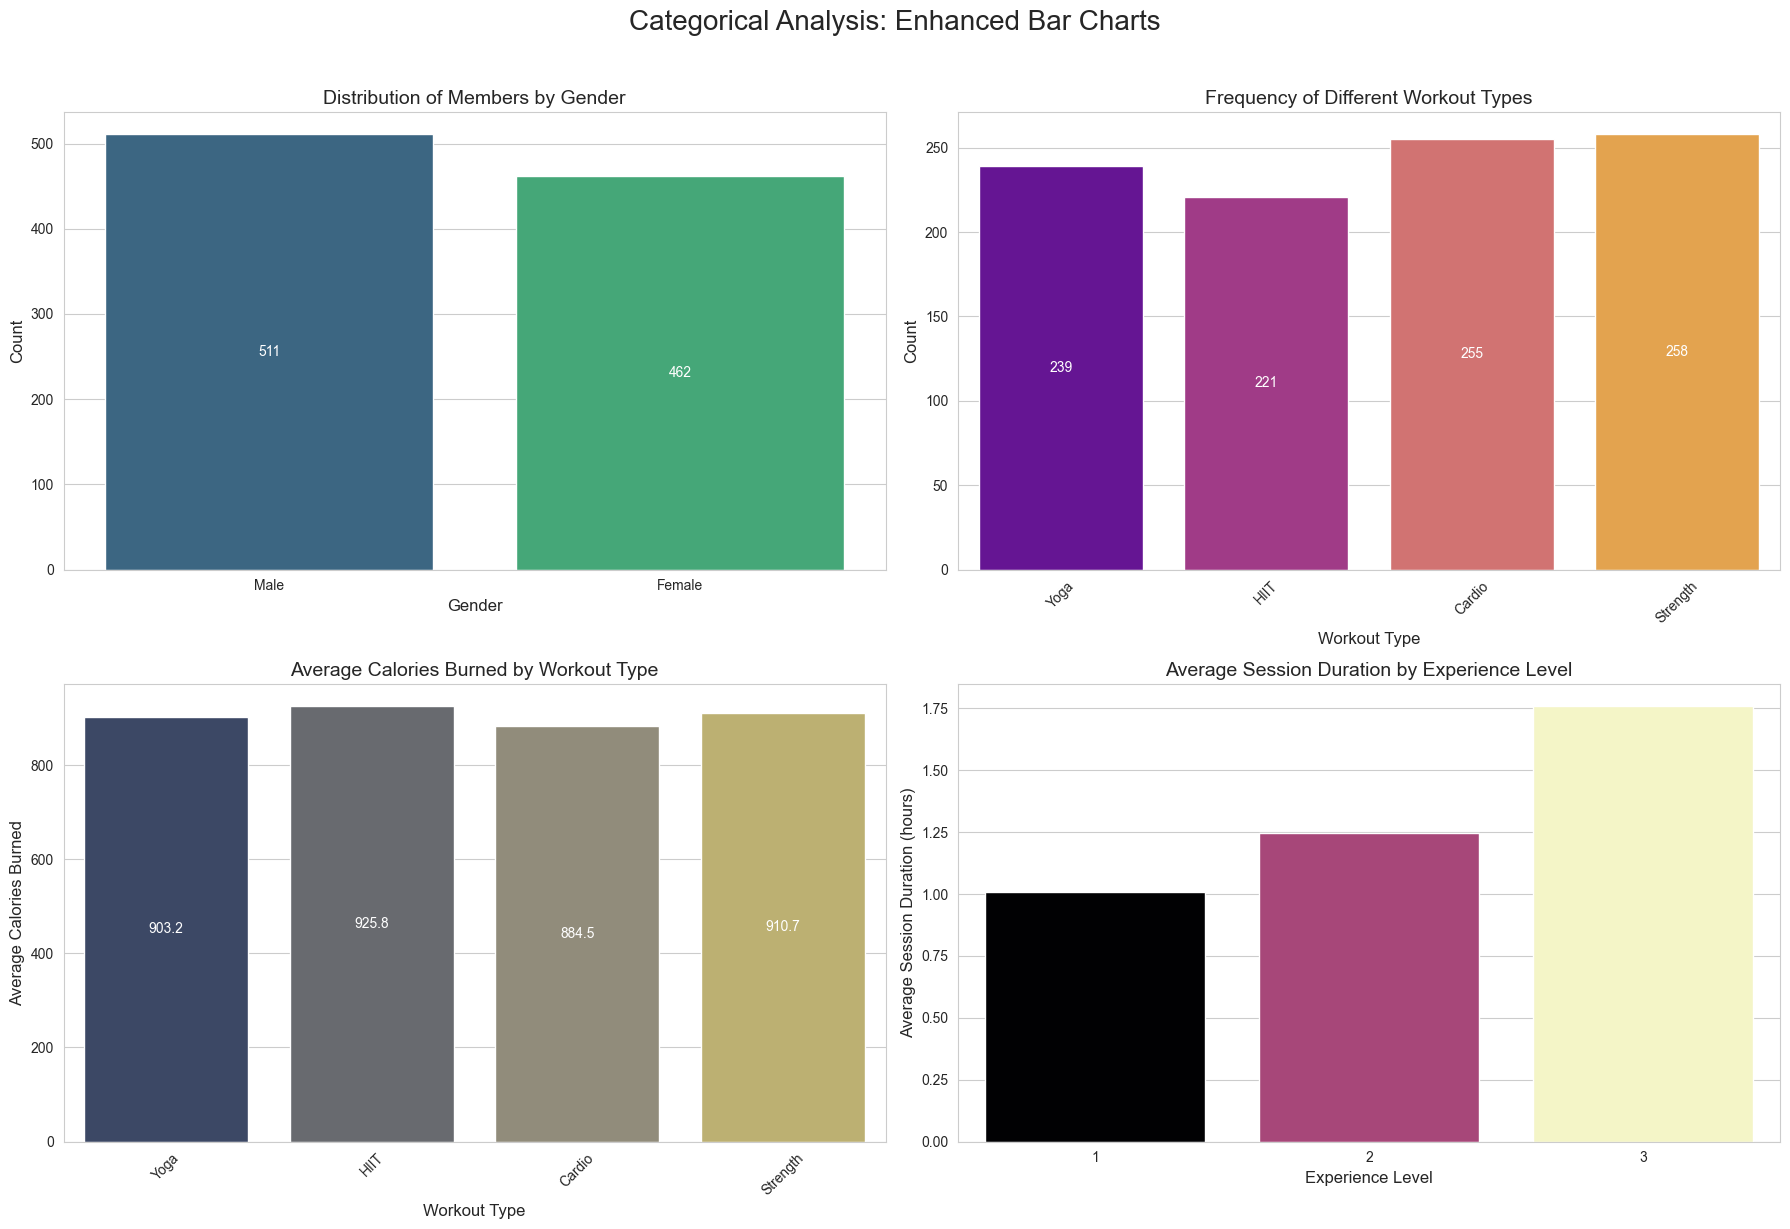

In [ ]:
def add_value_labels(ax, position="on_top", fmt='{:.0f}'):
    """
    Adds value labels to each bar in a plot.

    Args:
        ax (plt.Axes): The axes object to add labels to.
        position (str): The position of the labels.
                        'on_top' (default) places labels above the bars.
                        'within' places labels inside the bars.
        fmt (str): The format string for the labels (e.g., '{:.0f}' for integers,
                   '{:.1f}' for one decimal place).
    """
    # Loop over each bar (patch) in the axes
    for p in ax.patches:
        # Get the height of the bar
        height = p.get_height()
        # Define the x-coordinate for the text (center of the bar)
        x = p.get_x() + p.get_width() / 2.

        if position == 'on_top':
            # Position the text slightly above the bar
            y = height + 1
            # Add the text label
            ax.text(x, y, fmt.format(height),
                    ha='center', va='bottom', fontsize=10)
        elif position == 'within':
            # Position the text in the middle of the bar
            y = height / 2
            # Add the text label with white color for contrast
            ax.text(x, y, fmt.format(height), ha='center',
                    va='center', color='white', fontsize=10)


def create_count_and_bar_charts(df):
    """
    Generates a set of categorical charts with labels placed on top of or within the bars.

    Args:
        df (pd.DataFrame): The DataFrame containing the data for the plots.
    """
    # Set the visual style for the plots using seaborn
    sns.set_style("whitegrid")

    # Create a figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
    # Flatten the axes array to easily iterate through them
    axes = axes.flatten()

    # --- Plot 1: Count of Gender (Labels on top) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.countplot(x='Gender', hue='Gender', data=df,
                  ax=axes[0], palette='viridis')
    axes[0].set_title('Distribution of Members by Gender', fontsize=14)
    axes[0].set_xlabel('Gender', fontsize=12)
    axes[0].set_ylabel('Count', fontsize=12)
    # Add labels using the utility function, placed on top
    add_value_labels(axes[0], position='within')

    # --- Plot 2: Count of Workout Type (Labels within) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.countplot(x='Workout_Type', hue='Workout_Type',
                  data=df, ax=axes[1], palette='plasma')
    axes[1].set_title('Frequency of Different Workout Types', fontsize=14)
    axes[1].set_xlabel('Workout Type', fontsize=12)
    axes[1].set_ylabel('Count', fontsize=12)
    # Rotate x-axis labels for readability
    axes[1].tick_params(axis='x', rotation=45)
    # Add labels using the utility function, placed within the bars
    add_value_labels(axes[1], position='within')

    # --- Plot 3: Average Calories Burned by Workout Type (Labels within) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.barplot(x='Workout_Type', y='Calories_Burned', hue='Workout_Type',
                data=df, ax=axes[2], palette='cividis', errorbar=None)
    axes[2].set_title('Average Calories Burned by Workout Type', fontsize=14)
    axes[2].set_xlabel('Workout Type', fontsize=12)
    axes[2].set_ylabel('Average Calories Burned', fontsize=12)
    # Rotate x-axis labels for readability
    axes[2].tick_params(axis='x', rotation=45)
    # Add labels using the utility function, placed within, formatted to one decimal place
    add_value_labels(axes[2], position='within', fmt='{:.1f}')

    # --- Plot 4: Average Session Duration by Experience Level (Labels on top) ---
    # Add hue=x to avoid Seaborn deprecation warning.
    sns.barplot(x='Experience_Level', y='Session_Duration (hours)', hue='Experience_Level',
                data=df, ax=axes[3], palette='magma', errorbar=None, legend=False)
    axes[3].set_title(
        'Average Session Duration by Experience Level', fontsize=14)
    axes[3].set_xlabel('Experience Level', fontsize=12)
    axes[3].set_ylabel('Average Session Duration (hours)', fontsize=12)
    # Ensure x-axis labels are integers
    axes[3].xaxis.set_major_locator(plt.MaxNLocator(integer=True))

    # Add a main title for the entire figure
    fig.suptitle('Categorical Analysis: Enhanced Bar Charts',
                 fontsize=20, y=1.02)

    # Automatically adjust subplot parameters to give a tight layout
    plt.tight_layout()

    # Display the plots
    plt.show()


create_count_and_bar_charts(df)

##### Results

1. **Gender**
    - The gym membership population is nearly evenly split between genders, though Male members are slightly more prevalent. 
2. **Workout_Type**
    - The data shows a very balanced distribution across the four types of workouts, suggesting that the gym members are not overwhelmingly focused on a single type of training.
3. **Experience_Level**
    - The majority of the members fall into the lower and intermediate experience categories (Levels 1 and 2), with a notable drop-off for the most experienced group.
4. **Workout_Frequency (days/week)**
    - The most popular workout frequencies are 3 and 4 days per week, accounting for over two-thirds of the members. Very high frequency (5 days/week) is the least common.

The categorical profile of the gym’s membership reveals a highly balanced and broad audience, with a near-equal gender split and a diverse range of member engagement across all Workout_Types (Cardio, Strength, HIIT, and Yoga are equally popular). Crucially, the membership base is concentrated among Beginners and Intermediates (Experience Levels 1 and 2 make up over 80%), indicating that the primary audience is not highly specialized and whose needs should guide program and training service development. This broad base demonstrates a healthy level of commitment, with the majority of members attending a sustainable 3 to 4 days per week, suggesting a positive balance between fitness goals and personal life.

___

## 3. Data Cleaning & Transformation

Since the dataset has no missing values, inconsistent formats, or clear outliers, we conclude it is "clean" and does not need to undergo any data cleansing.

### Data Transformation

This section outlines the process of transforming the raw dataset to ensure it is in the optimal format for analysis and model building. While the dataset has high structural integrity with no missing values, several features require transformation to be used effectively. Specifically, we will address the conversion of categorical data into a numerical format, and the scaling of numerical features to standardize their range. This process ensures all variables are ready for potential use in machine learning models, preventing potential issues with feature bias and performance.

#### Feature Scaling

We standardize the numerical columns using `StandardScaler` from the `scikit-learn` library, transforming its values so that they have a **mean of 0** and a **standard deviation of 1**.

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

# Identify numerical columns to scale
numerical_cols = ['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)',
                  'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)', 'Workout_Frequency (days/week)', 'Experience_Level', 'BMI']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the numerical data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled data (first 5 rows)
print(df[numerical_cols].head())

#### Encoding Categorical Variables

We use `get_dummies()` from `pandas` to perform one-hot encoding.

In [ ]:
# Identify categorical columns to encode
categorical_cols = ['Gender', 'Workout_Type']

# Perform one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display the transformed DataFrame with the new columns
print(df.head())

#### Binning/Discretization

#### Feature Engineering

#### Skewed Data Handling

#### Dimensionality Reduction

---

*any blocks below this text is meant to added back into the final arrangement of the report at later date*

In [ ]:
# Import visualization libraries, Matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.histplot(data=df, x="Age", stat="count").set(title="Age Histogram Plot")

Based on the histogram, we have fairly distributed range of observed individuals